In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import plotly.graph_objs as go


In [2]:
df = pd.read_csv('Zomato_Chennai_Dataset.csv')
df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


### Pre processing of data


In [3]:
#replaces invalid entries with Nan
df.replace(to_replace = ['None','Invalid','Does not offer Delivery','Does not offer Dining','Not enough Delivery Reviews','Not enough Dining Reviews'], value =np.nan,inplace=True)
#total count of missing values 
df.isnull().sum()

Zomato URL                  0
Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes               9641
Price for 2                 0
Dining Rating            5351
Dining Rating Count      5351
Delivery Rating          5851
Delivery Rating Count    5851
Features                    0
dtype: int64

In [4]:
#Drop rows with any missing values
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [6]:
#Convert the Name of Restaurant column to lowercase for consistency.
df['name of restaurant'] = df['Name of Restaurant'].apply(lambda x: x.lower())


In [7]:
#The Top Dishes, Cuisine, and Features columns contain lists of items stored as strings. Clean these columns by removing unwanted characters and splitting them into lists.
# Convert to string (if not already) and clean the columns
df['Top Dishes'] = df['Top Dishes'].astype(str).apply(lambda x: x.replace('[','').replace(']','').replace("'",'').replace('  ','').split(','))
df['Cuisine'] = df['Cuisine'].astype(str).apply(lambda x: x.replace('[','').replace(']','').replace("'",'').replace('  ','').split(','))
df['Features'] = df['Features'].apply(lambda x: x.replace('[','').replace(']','').replace("'",'').replace('  ','').split(','))


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1678 entries, 0 to 11134
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             1678 non-null   object 
 1   Name of Restaurant     1678 non-null   object 
 2   Address                1678 non-null   object 
 3   Location               1678 non-null   object 
 4   Cuisine                1678 non-null   object 
 5   Top Dishes             1678 non-null   object 
 6   Price for 2            1678 non-null   float64
 7   Dining Rating          1678 non-null   float64
 8   Dining Rating Count    1678 non-null   object 
 9   Delivery Rating        1678 non-null   float64
 10  Delivery Rating Count  1678 non-null   object 
 11  Features               1678 non-null   object 
 12  name of restaurant     1678 non-null   object 
dtypes: float64(3), object(10)
memory usage: 183.5+ KB


In [9]:
#The Dining Rating Count and Delivery Rating Count columns should be numeric, but they are currently stored as objects. Convert them to Float32.
df['Dining Rating Count'] = df['Dining Rating Count'].astype("Float32")
df['Delivery Rating Count'] = df['Delivery Rating Count'].astype("Float32")


In [10]:
# Check the first few rows and the data types again
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1678 entries, 0 to 11134
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             1678 non-null   object 
 1   Name of Restaurant     1678 non-null   object 
 2   Address                1678 non-null   object 
 3   Location               1678 non-null   object 
 4   Cuisine                1678 non-null   object 
 5   Top Dishes             1678 non-null   object 
 6   Price for 2            1678 non-null   float64
 7   Dining Rating          1678 non-null   float64
 8   Dining Rating Count    1678 non-null   Float32
 9   Delivery Rating        1678 non-null   float64
 10  Delivery Rating Count  1678 non-null   Float32
 11  Features               1678 non-null   object 
 12  name of restaurant     1678 non-null   object 
dtypes: Float32(2), float64(3), object(8)
memory usage: 173.7+ KB


<class 'pandas.core.frame.DataFrame'>
Index: 1678 entries, 0 to 11134
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             1678 non-null   object 
 1   Name of Restaurant     1678 non-null   object 
 2   Address                1678 non-null   object 
 3   Location               1678 non-null   object 
 4   Cuisine                1678 non-null   object 
 5   Top Dishes             1678 non-null   object 
 6   Price for 2            1678 non-null   float64
 7   Dining Rating          1678 non-null   float64
 8   Dining Rating Count    1678 non-null   Float32
 9   Delivery Rating        1678 non-null   float64
 10  Delivery Rating Count  1678 non-null   Float32
 11  Features               1678 non-null   object 
 12  name of restaurant     1678 non-null   object 
dtypes: Float32(2), float64(3), object(8)
memory usage: 173.7+ KB


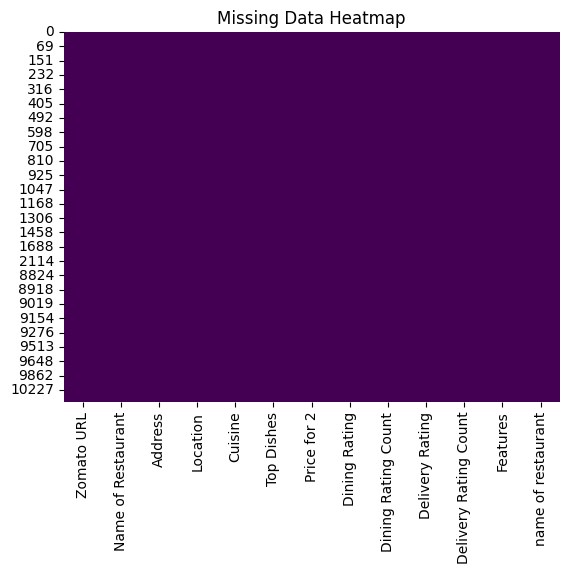

In [11]:
# Check basic information about the dataset
df.info()

# Visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


### Dining vs. Delivery Ratings

C:\Users\avata\AppData\Local\Temp\ipykernel_8972\2068784681.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Dining Rating'], label='Dining Rating', shade=True)
C:\Users\avata\AppData\Local\Temp\ipykernel_8972\2068784681.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Delivery Rating'], label='Delivery Rating', shade=True)


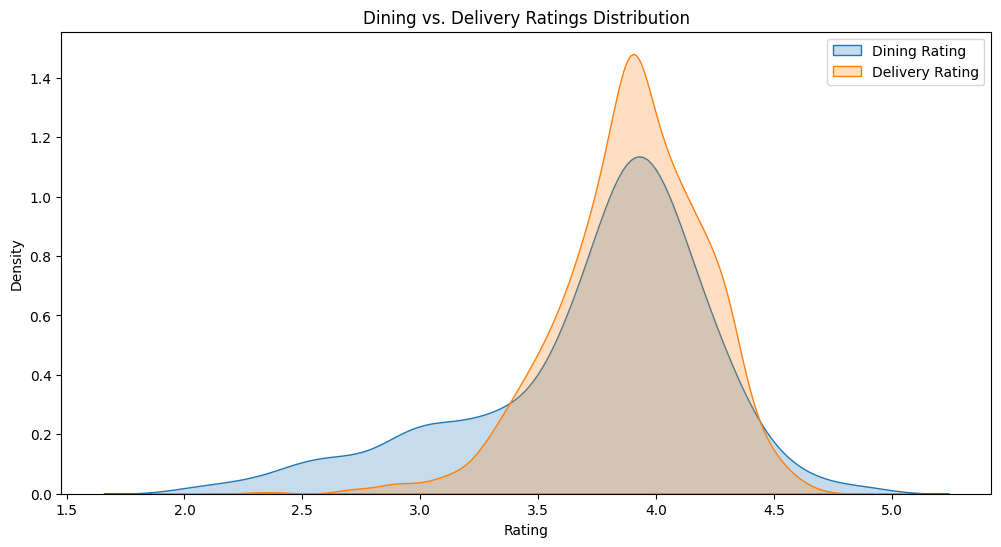

In [12]:
#Distribution of Restaurant Ratings
# Compare dining and delivery ratings
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Dining Rating'], label='Dining Rating', shade=True)
sns.kdeplot(df['Delivery Rating'], label='Delivery Rating', shade=True)
plt.title('Dining vs. Delivery Ratings Distribution')
plt.xlabel('Rating')
plt.legend()
plt.show()

#### Comparison of Dining and Delivery Ratings:
Delivery Ratings (orange curve): The distribution is more peaked and slightly shifted towards higher ratings, with most of the ratings clustered around 4. This indicates that customers tend to rate delivery services more favorably compared to dining experiences.

Dining Ratings (blue curve): The distribution is wider and slightly lower, indicating more variability in dining ratings. There's a slight dip around ratings of 2, which might indicate some less satisfactory dining experiences.

Both distributions have their peaks around a rating of 4, suggesting that whether customers are dining in or ordering delivery, they generally give a rating close to 4, which could be considered "good" or "very good."

### Cuisine Popularity in Chennai

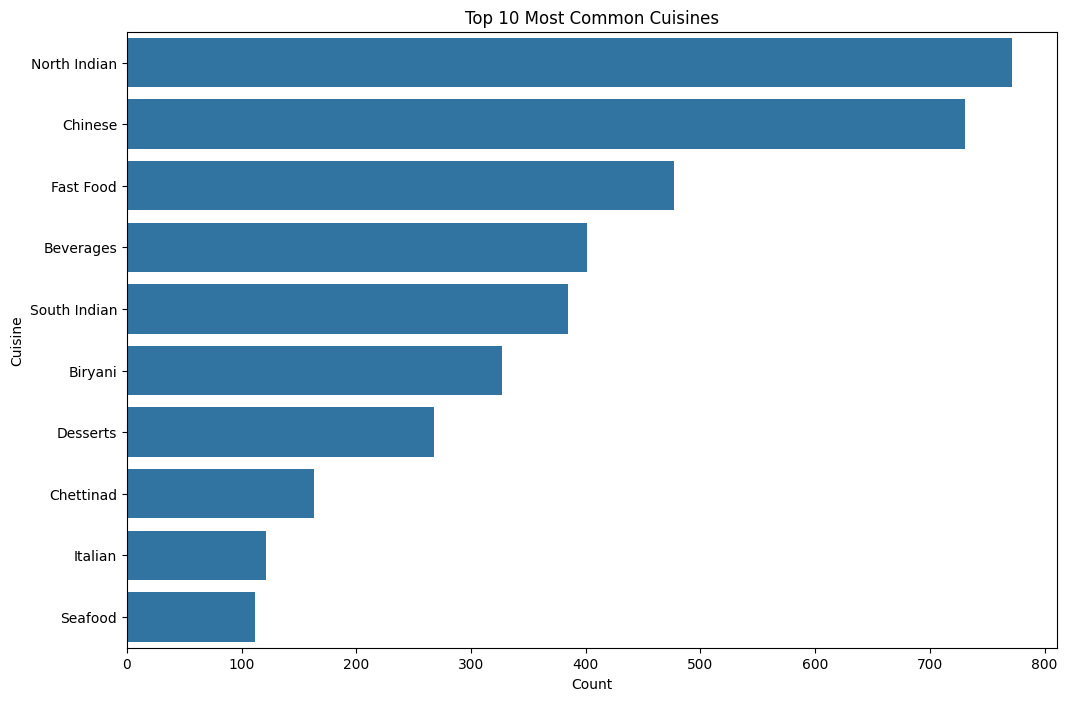

In [13]:
# Count the most common cuisines
from collections import Counter

cuisine_counter = Counter([cuisine for sublist in df['Cuisine'] for cuisine in sublist])
common_cuisines = pd.DataFrame(cuisine_counter.items(), columns=['Cuisine', 'Count']).sort_values(by='Count', ascending=False)

# Plot the most common cuisines
plt.figure(figsize=(12, 8))
sns.barplot(y='Cuisine', x='Count', data=common_cuisines.head(10))
plt.title('Top 10 Most Common Cuisines')
plt.show()

### Top Dishes Analysis

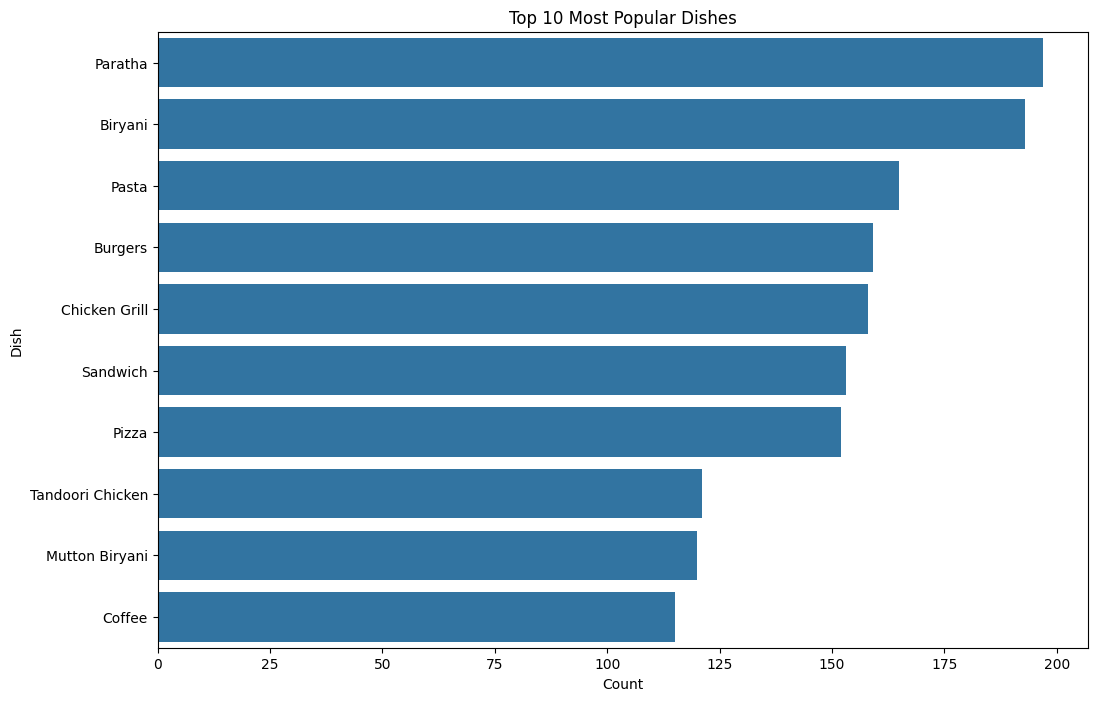

In [14]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude NaN values in 'Top Dishes'
df_filtered = df['Top Dishes'].dropna()

# Count the most popular dishes
dish_counter = Counter([dish for sublist in df_filtered for dish in sublist])
popular_dishes = pd.DataFrame(dish_counter.items(), columns=['Dish', 'Count']).sort_values(by='Count', ascending=False)

# Plot the most popular dishes
plt.figure(figsize=(12, 8))
sns.barplot(y='Dish', x='Count', data=popular_dishes.head(10))
plt.title('Top 10 Most Popular Dishes')
plt.show()



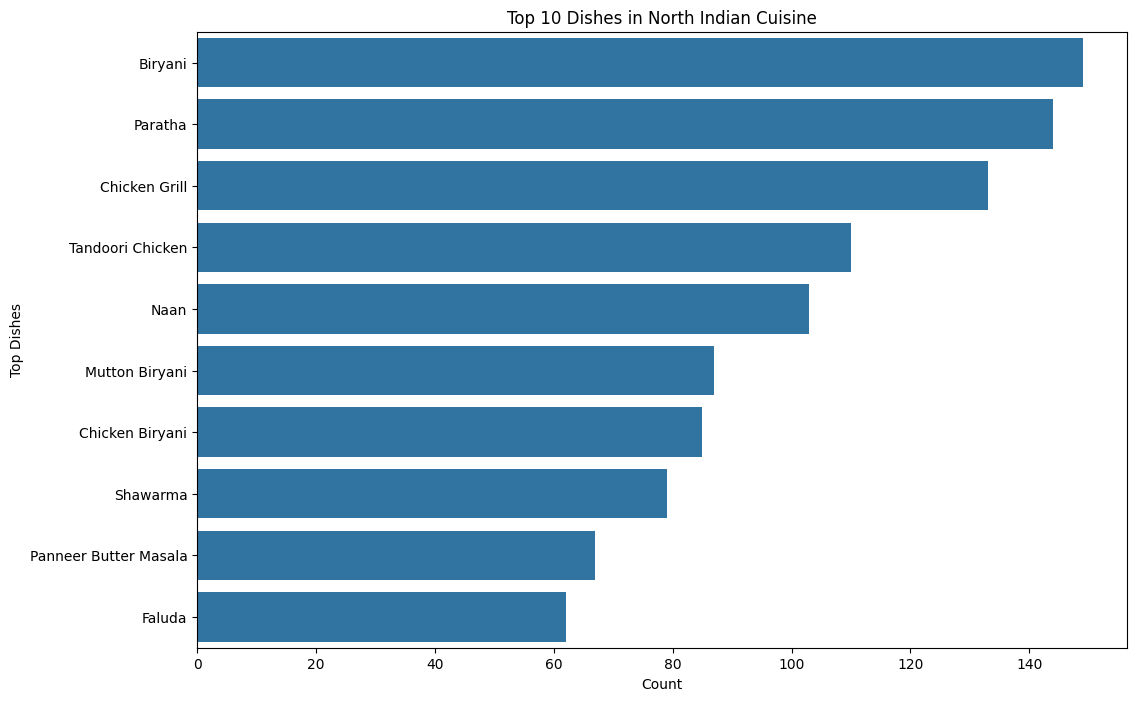

In [15]:
# Calculate top dishes within each cuisine
top_dishes_by_cuisine = df.explode('Cuisine').explode('Top Dishes').groupby(['Cuisine', 'Top Dishes']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# View the top dishes for a specific cuisine (e.g., 'North Indian')
top_dishes_north_indian = top_dishes_by_cuisine[top_dishes_by_cuisine['Cuisine'] == 'North Indian'].head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y='Top Dishes', x='Count', data=top_dishes_north_indian)
plt.title('Top 10 Dishes in North Indian Cuisine')
plt.show()

### Exploring Restaurant Features

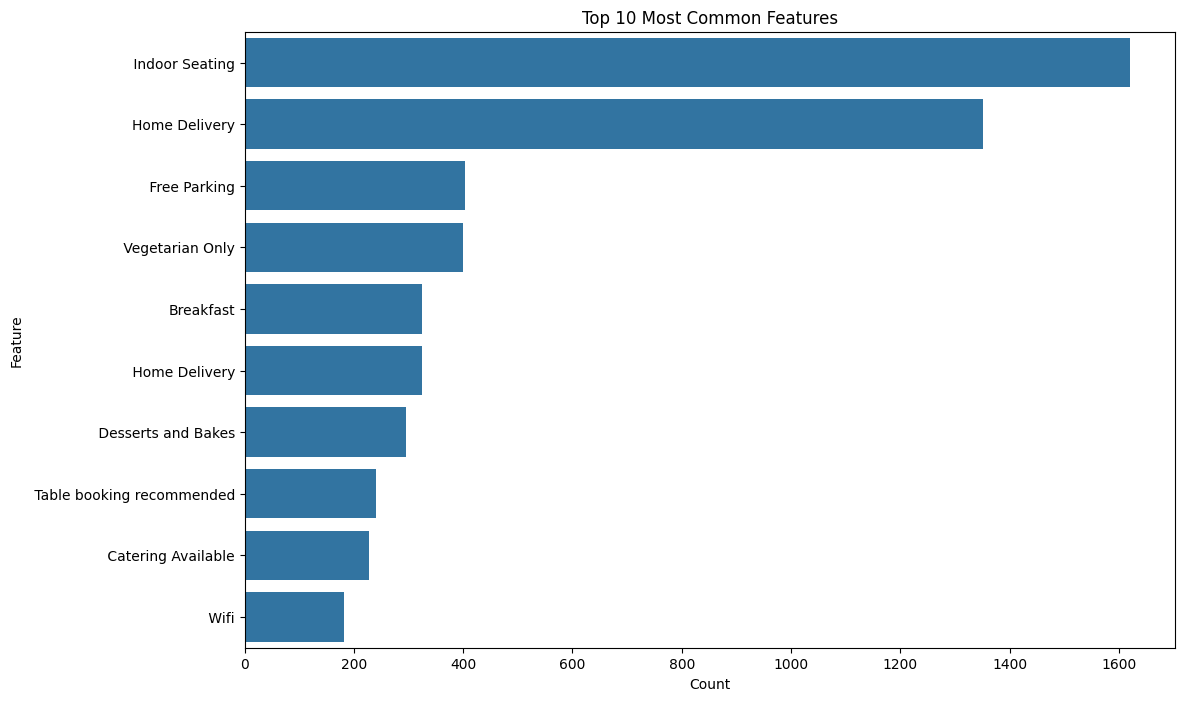

In [16]:
# Count the most common features
feature_counter = Counter([feature for sublist in df['Features'] for feature in sublist])
common_features = pd.DataFrame(feature_counter.items(), columns=['Feature', 'Count']).sort_values(by='Count', ascending=False)

# Plot the most common features
plt.figure(figsize=(12, 8))
sns.barplot(y='Feature', x='Count', data=common_features.head(10))
plt.title('Top 10 Most Common Features')
plt.show()



### Price Range Distribution

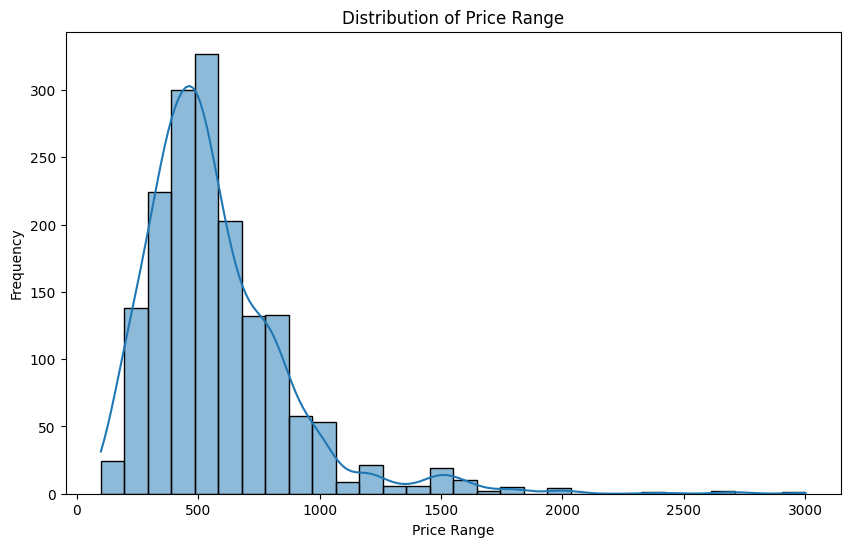

In [17]:
# Plot the distribution of price range
plt.figure(figsize=(10, 6))
sns.histplot(df['Price for 2'], kde=True, bins=30)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()


In [18]:
print(df.columns)



Index(['Zomato URL', 'Name of Restaurant', 'Address', 'Location', 'Cuisine',
       'Top Dishes', 'Price for 2', 'Dining Rating', 'Dining Rating Count',
       'Delivery Rating', 'Delivery Rating Count', 'Features',
       'name of restaurant'],
      dtype='object')
